In [202]:
from datasetsforecast.m4 import M4

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.tsa.holtwinters as es
import statsmodels.tsa.exponential_smoothing.ets as ets

import matplotlib.pyplot as plt

In [192]:
df_all, *_ = M4.load('./data', 'Hourly')
df_all['ds'] = df_all['ds'].astype(int)

# Just pick out the first few datasets to work with.
n_series = 20
uids = df_all['unique_id'].unique()[:n_series]
df = df_all.query('unique_id in @uids').copy()

df.head()

,unique_id,ds,y
0,H1,1,605.0
1,H1,2,586.0
2,H1,3,586.0
3,H1,4,559.0
4,H1,5,511.0


In [193]:
ds = df.query("unique_id == 'H116'")
ds.head()

,unique_id,ds,y
14212,H116,1,4205.0
14213,H116,2,3939.0
14214,H116,3,3672.0
14215,H116,4,3384.0
14216,H116,5,3090.0


### Exponential Smoothing method

Dep. Variable:,y,No. Observations:,748
Model:,SimpleExpSmoothing,SSE,22360954.308
Optimized:,True,AIC,7712.457
Trend:,None,BIC,7721.692
Seasonal:,None,AICC,7712.511
Seasonal Periods:,None,Date:,"Fri, 23 Feb 2024"
Box-Cox:,False,Time:,10:11:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,4205.0000,l.0,False


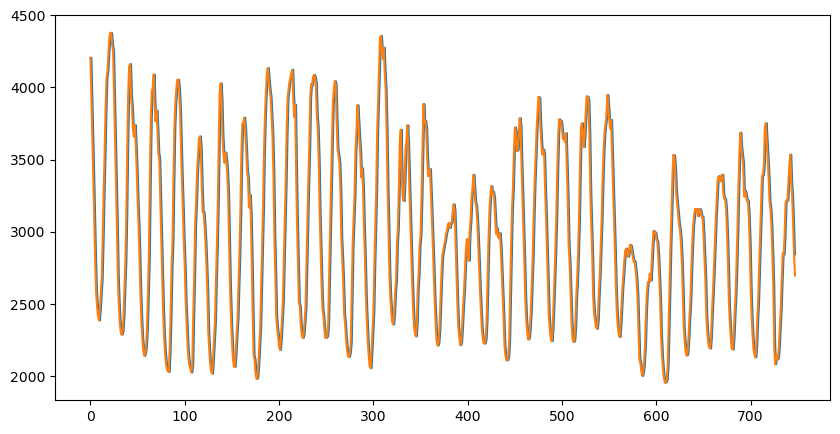

In [194]:
Ys = ds['y'].reset_index(drop=True)

model = es.SimpleExpSmoothing(Ys)
fit = model.fit()

fit_values = fit.fittedvalues

fit_values.plot(figsize=(10,5))
Ys.plot(figsize=(10,5))

fit.summary()

### Holt's Linear Trend method

Dep. Variable:,y,No. Observations:,748
Model:,ExponentialSmoothing,SSE,8447041.421
Optimized:,True,AIC,6988.279
Trend:,Additive,BIC,7006.749
Seasonal:,None,AICC,6988.392
Seasonal Periods:,None,Date:,"Fri, 23 Feb 2024"
Box-Cox:,False,Time:,10:11:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.9713095,beta,True


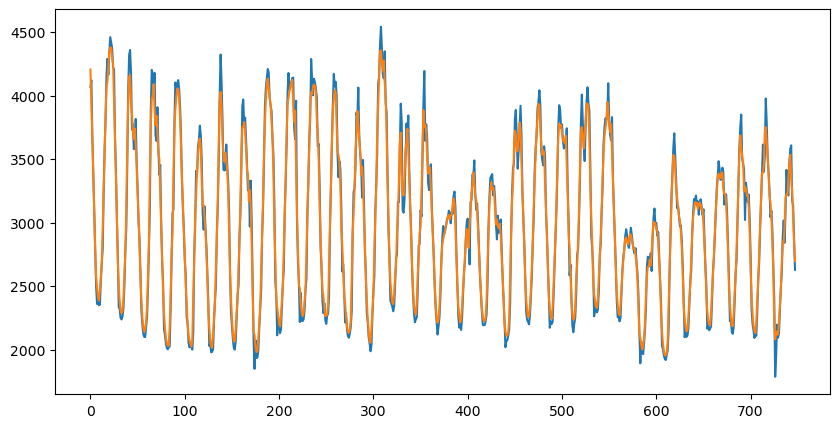

In [195]:
model = es.ExponentialSmoothing(Ys, trend='add', seasonal=None)
fit = model.fit()

fit_values = fit.fittedvalues

fit_values.plot(figsize=(10,5))
Ys.plot(figsize=(10,5))

fit.summary()

### Holt-Winter's method

Dep. Variable:,y,No. Observations:,748
Model:,ExponentialSmoothing,SSE,5785186.796
Optimized:,True,AIC,6945.149
Trend:,Additive,BIC,7517.707
Seasonal:,Additive,AICC,6996.686
Seasonal Periods:,120,Date:,"Fri, 23 Feb 2024"
Box-Cox:,False,Time:,10:11:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9723302,alpha,True
smoothing_trend,0.0115487,beta,True


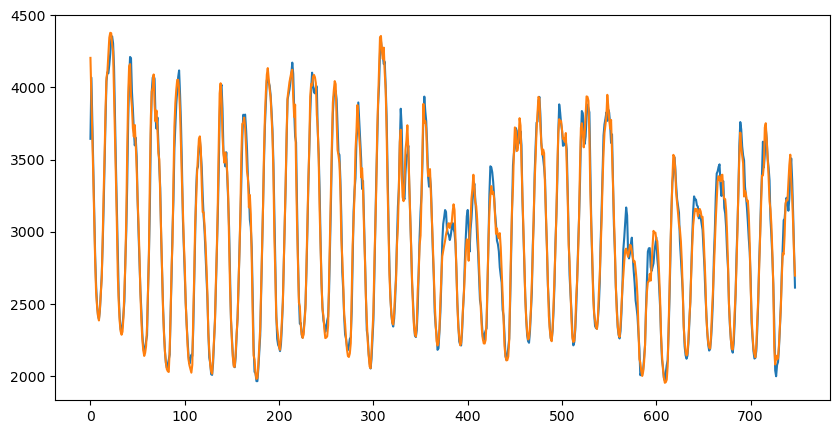

In [196]:
model = es.ExponentialSmoothing(Ys, trend='add', seasonal='add', seasonal_periods=120)
fit = model.fit()

fit_values = fit.fittedvalues

fit_values.plot(figsize=(10,5))
Ys.plot(figsize=(10,5))

fit.summary()

### ETS Model

In [205]:
model = ets.ETSModel(Ys, trend='add', seasonal='add', seasonal_periods=120)
fit = model.fit()

forecast = fit.get_prediction(steps=12)
forecast_conf_int = forecast.summary_frame(alpha=0.05)

print(forecast_conf_int)

c:\Users\Seraph\mambaforge\envs\forecasting\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            mean     pi_lower     pi_upper
0    4610.526136  4400.845587  4820.206686
1    4326.814079  4117.133530  4536.494629
2    3621.885428  3412.204879  3831.565978
3    3373.008201  3163.327651  3582.688751
4    3068.663890  2858.983341  3278.344440
..           ...          ...          ...
743  3589.178541  3379.497992  3798.859091
744  3181.658031  2971.977481  3391.338580
745  3032.298445  2822.617896  3241.978995
746  2792.475242  2582.794693  3002.155792
747  2562.179488  2352.498938  2771.860037

[748 rows x 3 columns]


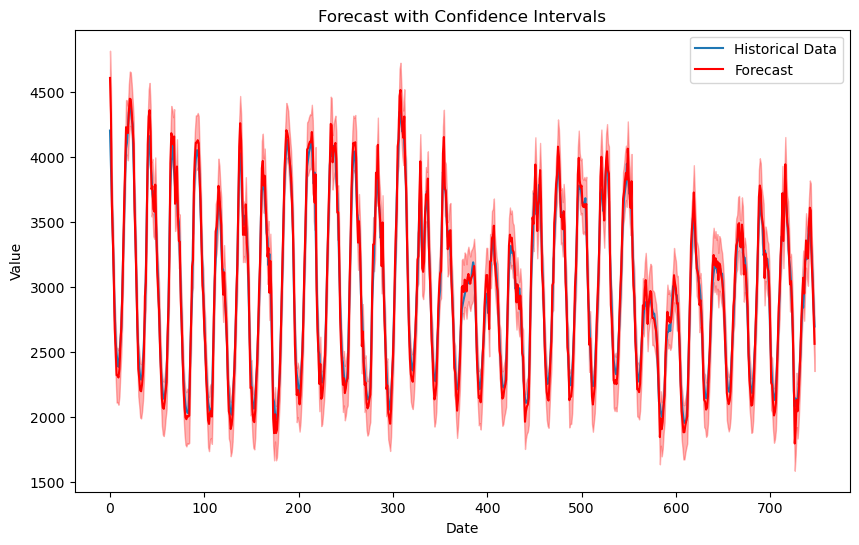

In [206]:
plt.figure(figsize=(10, 6))
plt.plot(Ys.index, Ys, label='Historical Data')

# Plot forecasted data
forecast_dates = forecast_conf_int.index  # Ensure this matches your forecast date range
plt.plot(forecast_dates, forecast_conf_int['mean'], label='Forecast', color='red')

# Plot confidence intervals
plt.fill_between(forecast_dates, forecast_conf_int['pi_lower'], forecast_conf_int['pi_upper'], color='red', alpha=0.3)

plt.title('Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()